# Taller Machine Learning
**Alumno:** Albert Moya

18/12/2026

## A1. Problema de Clasificación.Precios de la vivienda de california **3 puntos**

**Objetivo**: 
- Aplica un algoritmo de clasificación como es LinearSVC para evaluar el precio **categoríco** del valor de la casa: *MedHouseVal* en ese dataset. 
- Haz el **classification_report** del modelo. 
- Define las categorias de precio que consideres.
- ¿Qué categoría de las definidas obtiene el mejor f1-score?

**Metadata**
Attribute information:
- MedInc median income in block group
- HouseAge median house age in block group
- AveRooms average number of rooms per household
- AveBedrms average number of bedrooms per household
- Population block group population
- AveOccup average number of household members
- Latitude block group latitude
- Longitude block group longitude

The **target variable** is the median house value (*MedHouseVal*) for California districts, expressed in hundreds of thousands of dollars ($100,000).



In [48]:
# librerías
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
import pandas as pd

In [56]:
# Enunciado del problema
data = fetch_california_housing(as_frame=True)
df = data.frame #obtenemos el dataframe
print(df.head(3))
print("-"*100)
print(df.columns)

# Solución

# creamos variable categórica a partir de MedHouseVal
# dividimos en 3 categorías: bajo, medio, alto
df['MedHouseVal_cat'] = pd.cut(df['MedHouseVal'], bins=3, labels=['bajo', 'medio', 'alto'])

# separamos variables predictoras y variable objetivo
X = df.drop(['MedHouseVal', 'MedHouseVal_cat'], axis=1)
y = df['MedHouseVal_cat']

# separamos conjunto de entrenamiento y conjunto de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

# entrenamos el modelo
model = LinearSVC(random_state=0)
model.fit(X_train, y_train)

# evaluamos el modelo
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
print(classification_report(y_test, y_pred))

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
----------------------------------------------------------------------------------------------------
Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')
              precision    recall  f1-score   support

        alto       0.82      0.43      0.56       591
        bajo       0.73      0.90      0.81      2016
       medio       0.65      0.57      0.61      1521

    accuracy                           0.71      4128
   macro avg       0.73      0.63      0.66      4128
weight

La categoría `bajo` obtiene el mejor `f1-score` con un resultado de `0.81`.

In [9]:
# Pista: pd.cut https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# Ejemplo:
import pandas as pd
Y = [10,100,10000,4]
y = pd.cut(Y, bins=3, labels=['bajo', 'medio', 'alto'])
print(y)

['bajo', 'bajo', 'alto', 'bajo']
Categories (3, object): ['bajo' < 'medio' < 'alto']


## *Feature Selection* **1 punto**

En el siguiente [enlace](https://scikit-learn.org/stable/modules/feature_selection.html#tree-based-feature-selection) se explica cómo se puede usar un modelo para descartar características/features irrelevantes.

Aplicalo al dataset anterior, usando el siguiente valor `n_estimators=50`. ¿Cuántas features han sido descartadas?


In [57]:
# librerías
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

No puede ser un `ExtraTreesClassifier`como en el ejemplo porque tenemos variables contínuas.

In [58]:
# Solución

# utilizamos la función del link anterior
tree_model = ExtraTreesClassifier(n_estimators=50, random_state=42)
tree_model.fit(X, y)

# seleccionamos features importantes
selector = SelectFromModel(tree_model)
X_selected = selector.transform(X)

# mostramos resultados
print(X.shape)
print(X_selected.shape)

(20640, 8)
(20640, 3)


c:\Users\alber\projects\ttad_ml_project\.venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Como podemos observar se han eliminado 5 variables que se han considerado irrelevantes: $8 - 3 = 5$

## Clustering **3 puntos**

`Optics` es un algoritmo de clustering que se basa en la densidad de los datos.
[Ref](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html#sklearn.cluster.OPTICS)


Elige **UNO** de estos dos datasets y aplica el algoritmo de clustering `OPTICS`.
- [`load_wine`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine)
- [`load_digits`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits)

Importante, 
- Fija el número de min_samples al número de categorías disponibles en el dataset
- ¿Coinciden las etiquetas del algoritmo de clustering con la clasificación de las cinco primeras muestras del dataset? Nota: El "string" de las etiquetas no tienen porque coincidir.

In [ ]:
# librerías
from sklearn.datasets import load_digits
from sklearn.cluster import OPTICS
import numpy as np

Elegimos el conjunto de datos `digits`:

In [26]:
# Solución

# cargamos el dataset de dígitos
digits = load_digits()
X = digits.data
y = digits.target

# aplicamos el algoritmo OPTICS
n_classes = len(np.unique(y)) # unique porque queremos el número de clases
optics = OPTICS(min_samples=n_classes)
y_pred = optics.fit_predict(X)

# mostramos las primeras 5 etiquetas verdaderas y predichas
print(y[:5], y_pred[:5])

[0 1 2 3 4] [ 0 -1 -1 -1 -1]


Como podemos ver, las etiquetas no coinciden.

## Aplica una regressión Lasso a los siguientes datos y visualiza el valor de los coeficientes **3 puntos**


In [30]:
# librerías
from sklearn.datasets import make_regression
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
X, y = make_regression(n_samples=100,n_informative=6, n_features=6, coef=False,noise=100.0, random_state=33, bias=10.5)

df = pd.DataFrame(X)
df[7] = df[5] * 3
df[4] = df[4] + df[3]
df[8] = df[4] / 2

X = df.to_numpy()
print(df.head())

          0         1         2         3         4         5         7  \
0  0.991136  1.630796 -1.900090 -0.111391 -1.232109  0.932722  2.798165   
1 -0.325548 -0.538166 -0.261746 -0.220028  0.109686  0.252768  0.758303   
2  1.937571  0.338847  1.876973  0.217793  0.086090  0.813308  2.439924   
3 -0.960129  0.511255  0.853085 -1.216964 -1.547833 -0.213646 -0.640938   
4 -1.352448 -0.613847 -1.060842 -0.222442  0.307362  0.087174  0.261521   

          8  
0 -0.616054  
1  0.054843  
2  0.043045  
3 -0.773917  
4  0.153681  


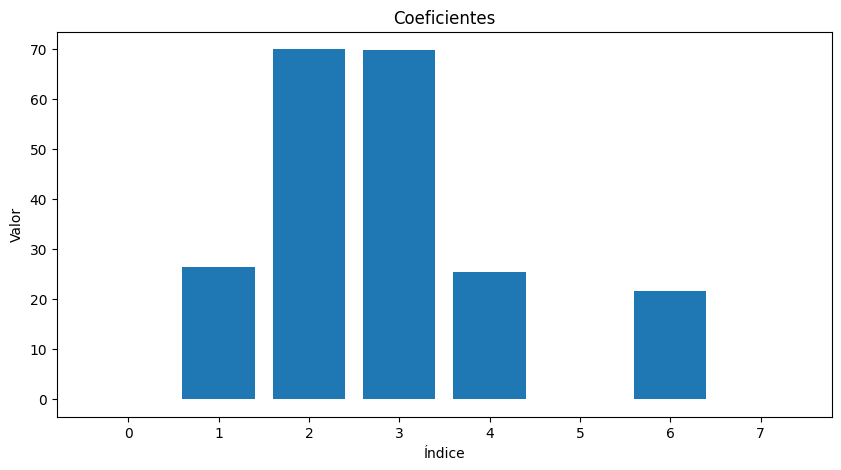

In [36]:
# Solución

# entrenamos el modelo Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(X, y)

# obtenemos los coeficientes y los representamos gráficamente
coef = lasso.coef_
plt.figure(figsize=(10,5))
plt.bar(range(len(coef)), coef)
plt.xlabel('Índice')
plt.ylabel('Valor')
plt.title('Coeficientes')
plt.show()

In [55]:
coef

array([-0.09566534, 26.35268763, 69.8994936 , 69.74452475, 25.44136163,
        0.        , 21.48118734,  0.        ])